In [15]:
# Importando os módulos necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configurando o pandas para mostrar todas as colunas e todas as linhas do dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [223]:
def tabela_limite(funcao, a=0, b=0, delta=1, n=11, graf=False):
    
    """Essa função gera uma tabela para limite de funções R² em R no ponto (a, b).
        
        funcao = função que você deseja encontrar o limite;
        
        a = coordenada x do ponto (padrão x = 0);
        
        b = coordenada y do ponto (padrão y = 0);
        
        delta = intervalo entre cada aproximação (padrão delta = 1)
        
        n = tamanho do intervalo (padrão n = 11)
        
        graf = mostrar a curva de nível da função ao redor do ponto P(a, b) (padrão graf = False)
        
        * Os valores 'nan' ou 'NaN' significam indeterminação (NaN = Not A Number)
    
    """
    
    ponto = (a, b)
        
    if n % 2 != 1:

        n += 1

    x = [np.round(i, 4) for i in np.linspace(ponto[0]-delta, (ponto[0]+delta), n, endpoint=True)]
    y = [np.round(i, 4) for i in np.linspace(ponto[1]-delta, (ponto[1]+delta), n, endpoint=True)]

    data = {}

    for i in x:

        data[f'{i}'] = [funcao(i, j) for j in y]

    df = pd.DataFrame(data, index=y)
    
    df.index.name = 'Y'
    df.columns.name = 'X'

    print(f'Valor da função no ponto ({ponto[0]}, {ponto[1]}):\n\nf({ponto[0]}, {ponto[1]}) = {funcao(ponto[0], ponto[1])}\n')
    
    if graf:
        
        plt.figure(figsize=(8, 6))
        
        curvas = plt.contour(x, y, [[funcao(xi, yi) for yi in y] for xi in x], 15)
        plt.clabel(curvas, inline=0.5, fontsize=8, colors='k')
        
        plt.title('Curvas de nível')
        plt.xlabel('X')
        plt.ylabel('Y')
        
        plt.plot(a, b, marker='.', color='black')
        
        plt.text(a, b , f'f({a}, {b}) = {funcao(a, b)}')

    return np.round(df, 4)

In [195]:
def funcao_1(x,y):

    try:
    
        z = ((x**2)*(y**2) + (x**3)*(y**2) - 5) / (2 - x*y)

        return z
    
    except ZeroDivisionError:
        
        return np.nan

def funcao_2(x,y):
    
    try:
    
        z = (2*x*y) / ((x**2) + (2*y**2))

        return z
    
    except ZeroDivisionError:
        
        return np.nan
    
def funcao_3(x, y):
    
    try:
    
        z = (x**4 - 4*y**2) / (x**2 - 2*y**2)

        return z
    
    except ZeroDivisionError:
        
        return np.nan
    
def funcao_4(x, y):
    
    try:
        
        z = (x**2 + y**2) ** 0.5
        
        return z
    
    except ZeroDivisionError:
        
        return np.nan

/home/vinicius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


Valor da função no ponto (0, 0):

f(0, 0) = nan



X,-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0
Y,,,,,,,,,,,
-1.0,3.0000,2.6400,2.3600,2.1600,2.0400,2.0,2.0400,2.1600,2.3600,2.6400,3.0000
-0.8,5.5714,3.3600,2.6417,2.2629,2.0632,2.0,2.0632,2.2629,2.6417,3.3600,5.5714
-0.6,-1.5714,12.8800,3.6400,2.5257,2.1153,2.0,2.1153,2.5257,3.6400,12.8800,-1.5714
-0.4,0.5294,-0.7200,-12.7600,3.8400,2.2800,2.0,2.2800,3.8400,-12.7600,-0.7200,0.5294
-0.2,0.9130,0.4457,-0.1086,-1.6800,3.9600,2.0,3.9600,-1.6800,-0.1086,0.4457,0.9130
0.0,1.0000,0.6400,0.3600,0.1600,0.0400,NaN,0.0400,0.1600,0.3600,0.6400,1.0000
0.2,0.9130,0.4457,-0.1086,-1.6800,3.9600,2.0,3.9600,-1.6800,-0.1086,0.4457,0.9130
0.4,0.5294,-0.7200,-12.7600,3.8400,2.2800,2.0,2.2800,3.8400,-12.7600,-0.7200,0.5294
0.6,-1.5714,12.8800,3.6400,2.5257,2.1153,2.0,2.1153,2.5257,3.6400,12.8800,-1.5714


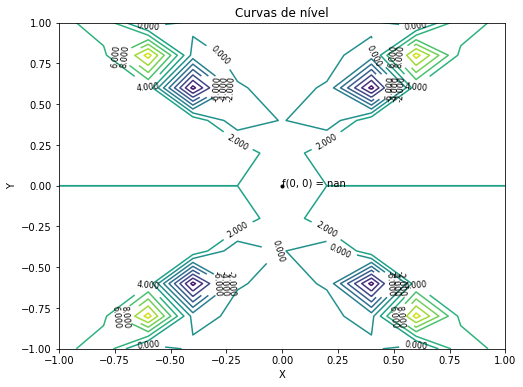

In [222]:
tabela_limite(funcao_3, graf=1)